In [19]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


In [8]:
df = pd.read_csv(r"/Users/GaneshvivekMannam/Downloads/Fraud.csv")
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [9]:
df.isnull().sum()


step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [11]:
df["type"].unique

<bound method Series.unique of 0           PAYMENT
1           PAYMENT
2          TRANSFER
3          CASH_OUT
4           PAYMENT
             ...   
6362615    CASH_OUT
6362616    TRANSFER
6362617    CASH_OUT
6362618    TRANSFER
6362619    CASH_OUT
Name: type, Length: 6362620, dtype: object>

In [15]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [13]:
df_pivot  = pd.pivot_table(df,index=["type"],values=['isFraud','isFlaggedFraud'],aggfunc=[np.sum,np.std],margins=True)
df_pivot

/var/folders/m5/kwdc5f_s6sq1kbmqlzgvddvc0000gn/T/ipykernel_35905/2796262995.py:1: FutureWarning: The provided callable <function sum at 0x105a50ee0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df_pivot  = pd.pivot_table(df,index=["type"],values=['isFraud','isFlaggedFraud'],aggfunc=[np.sum,np.std],margins=True)
/var/folders/m5/kwdc5f_s6sq1kbmqlzgvddvc0000gn/T/ipykernel_35905/2796262995.py:1: FutureWarning: The provided callable <function std at 0x105a54f70> is currently using DataFrameGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  df_pivot  = pd.pivot_table(df,index=["type"],values=['isFraud','isFlaggedFraud'],aggfunc=[np.sum,np.std],margins=True)


sum                    std          
         isFlaggedFraud isFraud isFlaggedFraud   isFraud
type                                                    
CASH_IN               0       0       0.000000  0.000000
CASH_OUT              0    4116       0.000000  0.042851
DEBIT                 0       0       0.000000  0.000000
PAYMENT               0       0       0.000000  0.000000
TRANSFER             16    4097       0.005479  0.087344
All                  16    8213       0.001586  0.035905

Only cash out and transfer are clasified as frauds

In [16]:
df_pivot2 = pd.pivot_table(df,index="type",values=['amount','oldbalanceOrg','newbalanceOrig'],aggfunc=[np.sum],margins=True)
df_pivot2

/var/folders/m5/kwdc5f_s6sq1kbmqlzgvddvc0000gn/T/ipykernel_35905/519814830.py:1: FutureWarning: The provided callable <function sum at 0x105a50ee0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df_pivot2 = pd.pivot_table(df,index="type",values=['amount','oldbalanceOrg','newbalanceOrig'],aggfunc=[np.sum],margins=True)


sum                             
                amount newbalanceOrig oldbalanceOrg
type                                               
CASH_IN   2.363674e+11   5.260438e+12  5.024078e+12
CASH_OUT  3.944130e+11   3.909851e+10  1.029783e+11
DEBIT     2.271992e+08   2.699778e+09  2.844196e+09
PAYMENT   2.809337e+10   1.330439e+11  1.467682e+11
TRANSFER  4.852920e+11   5.482651e+09  2.901255e+10
All       1.144393e+12   5.440763e+12  5.305681e+12

here only cash_out and transfer types are having that heavy diff in newbal and oldbal and a hug sum too present there

lets check the distributon of the first 1 lakh rows

<Axes: xlabel='amount', ylabel='Count'>

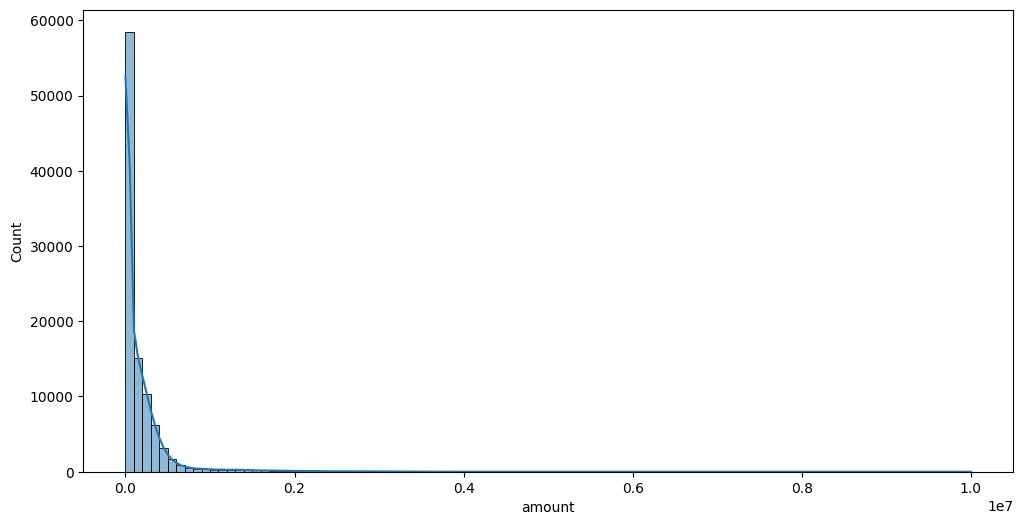

In [20]:
df_1lakh = df.head(100000)
plt.figure(figsize=(12,6))
sns.histplot(df_1lakh['amount'], bins=100, kde=True)

In [21]:
df_1lakh['amount'].quantile([0.90, 0.95, 0.99, 0.999])


0.900    3.976989e+05
0.950    6.071793e+05
0.990    1.871789e+06
0.999    3.316965e+06
Name: amount, dtype: float64

<Axes: xlabel='amount'>

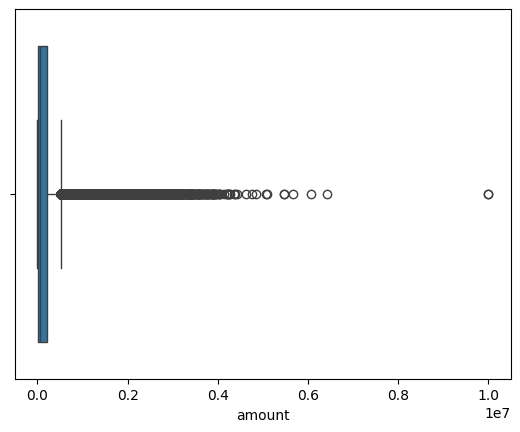

In [22]:
sns.boxplot(x=df_1lakh["amount"])


this infers that there are certain outliers outside 10M 

In [24]:
df["amount"].mean()

np.float64(179861.90354913071)

([<matplotlib.patches.Wedge at 0x3374d1820>,
 [Text(-0.004460500171216119, -1.0999909562983792, 'Not Fraud'),
  Text(0.004460666265229515, 1.09999095562485, 'Fraud')],
 [Text(-0.00243300009339061, -0.5999950670718431, '99.87%'),
  Text(0.0024330906901251894, 0.5999950667044635, '0.13%')])

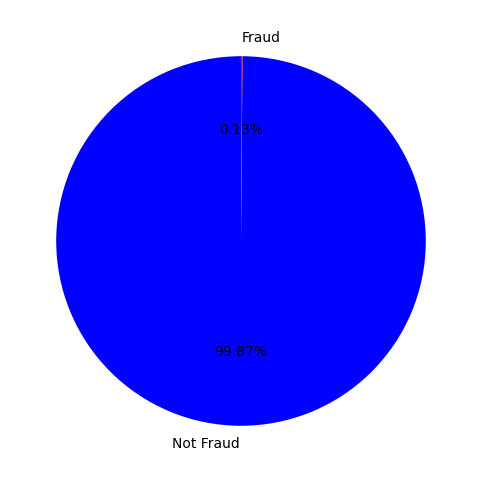

In [27]:
fraud_counts = df['isFraud'].value_counts()

# Labels for the chart
labels = ['Not Fraud', 'Fraud']
colors = ['blue', 'red']

# Create pie chart
plt.figure(figsize=(6, 6))
plt.pie(fraud_counts, labels=labels, colors=colors, autopct='%1.2f%%', startangle=90)

Needs class weights updation to have the importance of fraud for classifying the data as its not suffecient for now
or using SMOTE  will tell in the later markdowns

In [30]:
cashout_df = df[df['type'] == 'CASH_OUT']
transfer_df = df[df['type'] == 'TRANSFER']


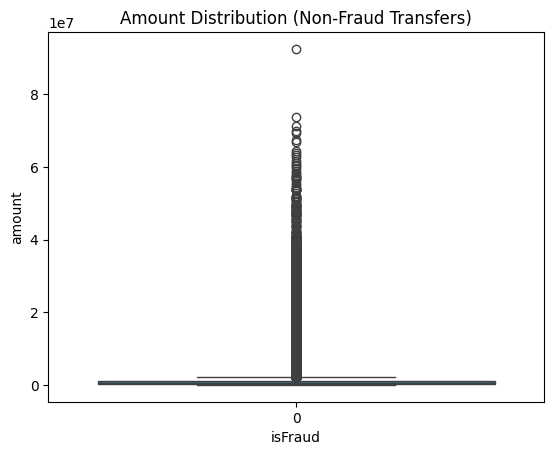

In [31]:

sns.boxplot(x='isFraud', y='amount', data=transfer_df[transfer_df['isFraud'] == 0])
plt.title("Amount Distribution (Non-Fraud Transfers)")
plt.show()


Outlier removal only of a limit that too legit transactions of higher amounts in outliers to avoid confusion 

In [32]:
q1 = transfer_df[transfer_df['isFraud'] == 0]['amount'].quantile(0.25)
q3 = transfer_df[transfer_df['isFraud'] == 0]['amount'].quantile(0.75)
iqr = q3 - q1

lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

transfer_filtered = transfer_df[
    (transfer_df['isFraud'] == 1) |  # keep all frauds
    ((transfer_df['amount'] >= lower) & (transfer_df['amount'] <= upper))
]

transfer_filtered

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
19,1,TRANSFER,215310.30,C1670993182,705.00,0.0,C1100439041,22425.00,0.00,0,0
24,1,TRANSFER,311685.89,C1984094095,10835.00,0.0,C932583850,6267.00,2719172.89,0,0
58,1,TRANSFER,62610.80,C1976401987,79114.00,16503.2,C1937962514,517.00,8383.29,0,0
78,1,TRANSFER,42712.39,C283039401,10363.39,0.0,C1330106945,57901.66,24044.18,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362610,742,TRANSFER,63416.99,C778071008,63416.99,0.0,C1812552860,0.00,0.00,1,0
6362612,743,TRANSFER,1258818.82,C1531301470,1258818.82,0.0,C1470998563,0.00,0.00,1,0
6362614,743,TRANSFER,339682.13,C2013999242,339682.13,0.0,C1850423904,0.00,0.00,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0


pca -analysis to find the distribution and check out if we can fit a decision boundary

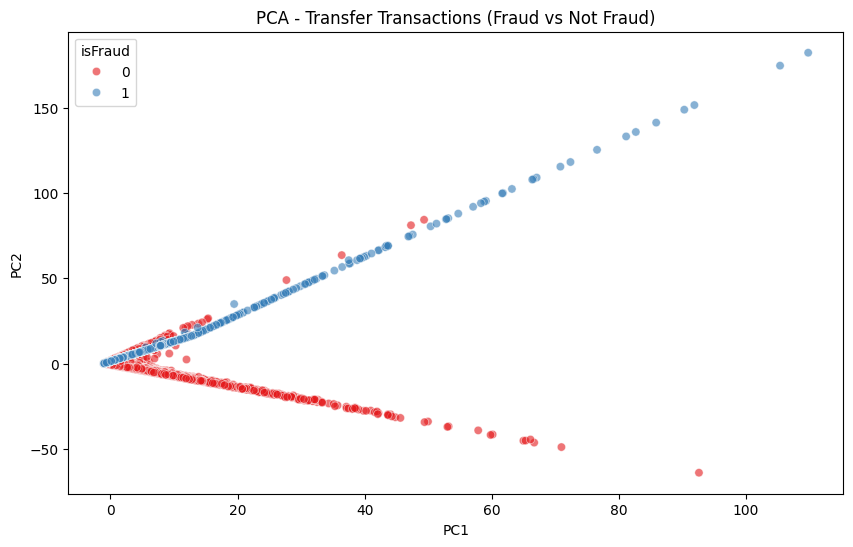

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

features = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

X = transfer_filtered[features]
y = transfer_filtered['isFraud']

# Step 2: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)



pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['isFraud'] = y.values

# Step 5: Visualize
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='isFraud', palette='Set1', alpha=0.6)
plt.title("PCA - Transfer Transactions (Fraud vs Not Fraud)")
plt.show()

svm with rbf kernel

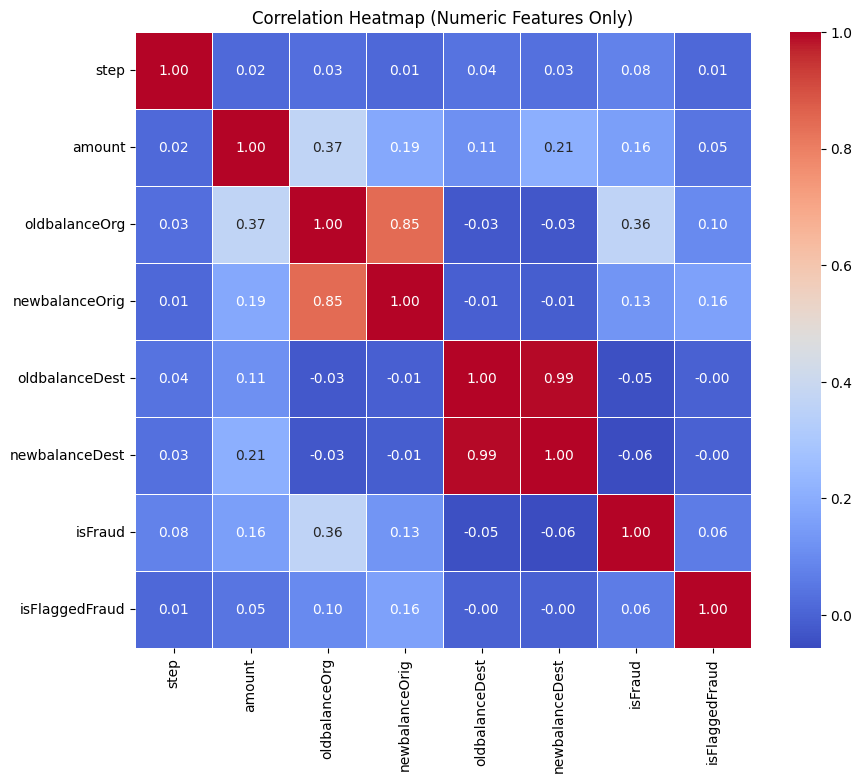

In [39]:
numeric_df = transfer_filtered.select_dtypes(include=['number'])


plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()

In [74]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, fbeta_score
from scipy.stats import loguniform


In [ ]:
# Step 3: Drop irrelevant columns
df_transfer_filtered = transfer_filtered.drop(['nameOrig', 'nameDest', 'type'], axis=1)


X = df_transfer_filtered.drop('isFraud', axis=1)
y = df_transfer_filtered['isFraud']


X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

SVM with rbf kernel

In [41]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


svm_rbf = SVC(kernel='rbf', class_weight='balanced', probability=True, random_state=42,max_iter=5000)
svm_rbf.fit(X_train_scaled, y_train)


SVC(class_weight='balanced', probability=True, random_state=42)

In [43]:
y_pred = svm_rbf.predict(X_test_scaled)
y_prob = svm_rbf.predict_proba(X_test_scaled)[:, 1]

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nROC-AUC Score:", roc_auc_score(y_test, y_prob))

Confusion Matrix:
[[103787   1976]
 [     6    813]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    105763
           1       0.29      0.99      0.45       819

    accuracy                           0.98    106582
   macro avg       0.65      0.99      0.72    106582
weighted avg       0.99      0.98      0.99    106582


ROC-AUC Score: 0.9991237925392592


SVM with linear kernel

In [75]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(), LinearSVC(max_iter=10000, class_weight='balanced'))
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)


print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, model.decision_function(X_test)))


Confusion Matrix:
 [[424388  22289]
 [    26    797]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.97    446677
           1       0.03      0.97      0.07       823

    accuracy                           0.95    447500
   macro avg       0.52      0.96      0.52    447500
weighted avg       1.00      0.95      0.97    447500

ROC-AUC Score: 0.9642636212094738


SVM with rbf worked bette as we can see the results we can get that
Linear SVM has even worse false positives.
RBF SVM is significantly better in terms of balance, even though still not perfect.

from imblearn.over_sampling import SMOTE
transfer_filtered = transfer_filtered.drop(columns=['type'])

X = transfer_filtered.drop(columns=['isFraud'])
y = transfer_filtered['isFraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

sm = SMOTE(random_state=42)
X_train_smote, y_train_smote = sm.fit_resample(X_train_scaled, y_train)

print(f"Original training samples: {len(y_train)}, After SMOTE: {len(y_train_smote)}")

svm_rbf = SVC(kernel='rbf', probability=True, random_state=42,max_iter=10000)
svm_rbf.fit(X_train_smote, y_train_smote)

y_pred = svm_rbf.predict(X_test_scaled)
y_proba = svm_rbf.predict_proba(X_test_scaled)[:, 1]

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))


just holding smote for now as it is a big dataset and where it makes the dataset double nw  ,SO avoidng smote for now

Logistic regression 

In [104]:

y = transfer_filtered['isFraud']
X = transfer_filtered.drop(columns=['isFraud', 'nameOrig', 'nameDest'])

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)


log_reg = LogisticRegression(class_weight='balanced', max_iter=10000, random_state=42)
log_reg.fit(X_train_scaled, y_train)
y_pred_log = log_reg.predict(X_test_scaled)
y_proba_log = log_reg.predict_proba(X_test_scaled)[:, 1]

print("=== Logistic Regression ===")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))
print("\nClassification Report:\n", classification_report(y_test, y_pred_log))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba_log))

=== Logistic Regression ===
Confusion Matrix:
 [[143244   3636]
 [     4   1225]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99    146880
           1       0.25      1.00      0.40      1229

    accuracy                           0.98    148109
   macro avg       0.63      0.99      0.69    148109
weighted avg       0.99      0.98      0.98    148109

ROC-AUC Score: 0.9975227005412055


Just focusing on Logistic reg model where it performs well than other models without taking much time

SO working on it tuning now and check again to increase precsion to an extent with maintaining that recall

Randomized searchCV  -fine tuning to find out the best parameters

In [135]:
f2_scorer = make_scorer(fbeta_score, beta=2)

param_dist = {
    'C': loguniform(1e-3, 1e2),  # wide and better than manual list
    'penalty': ['l2'],
    'class_weight': [None, 'balanced', {0: 1, 1: 5}, {0: 1, 1: 10}],
    'solver': ['lbfgs']
}

search = RandomizedSearchCV(
    LogisticRegression(max_iter=1000),
    param_distributions=param_dist,
    scoring=f2_scorer,
    n_iter=30,
    cv=5,
    random_state=42,
    n_jobs=-1
)

search.fit(X_train_scaled, y_train)
print(search.best_params_)

{'C': np.float64(55.51721685244721), 'class_weight': {0: 1, 1: 10}, 'penalty': 'l2', 'solver': 'lbfgs'}


In [136]:
best_logreg_transfer = LogisticRegression(
    C=73.92266140516048,
    class_weight={0:1, 1:5},
    penalty='l2',
    solver='lbfgs',
    max_iter=1000,
    random_state=42
)

best_logreg_transfer.fit(X_train_scaled, y_train)

# Step 2: Predict probabilities for test set
y_probs = best_logreg_transfer.predict_proba(X_test_scaled)[:, 1]

# Step 3: Search for best threshold using F2 score
thresholds = np.arange(0.0, 1.01, 0.01)
f2_scores = []

for thresh in thresholds:
    preds = (y_probs >= thresh).astype(int)
    f2_scores.append(fbeta_score(y_test, preds, beta=2))

best_thresh = thresholds[np.argmax(f2_scores)]
print("Best Threshold:", best_thresh)
print("Best F2 Score:", max(f2_scores))

# Step 4: Final prediction using best threshold
y_pred = (y_probs >= best_thresh).astype(int)


Best Threshold: 0.33
Best F2 Score: 0.7550644567219152


In [137]:

# Step 5: Evaluate model
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=4))

print("Final F2 Score (with best threshold):", fbeta_score(y_test, y_pred, beta=2))


Confusion Matrix:
[[436725    396]
 [   167    656]]

Classification Report:
              precision    recall  f1-score   support

           0     0.9996    0.9991    0.9994    437121
           1     0.6236    0.7971    0.6997       823

    accuracy                         0.9987    437944
   macro avg     0.8116    0.8981    0.8495    437944
weighted avg     0.9989    0.9987    0.9988    437944

Final F2 Score (with best threshold): 0.7550644567219152


In [138]:
from sklearn.metrics import roc_auc_score
print("ROC AUC:", roc_auc_score(y_test, y_probs))


ROC AUC: 0.9957181917895599


report over testing data

In [139]:
df_unseen = pd.read_csv(r"/Users/GaneshvivekMannam/Downloads/Fraud.csv")
X_unseen = df_unseen.drop(columns=['isFraud','nameOrig', 'nameDest', 'type'])  # or drop whatever the target column is
y_unseen = df_unseen['isFraud']

# Scale it using the same scaler used before
X_unseen_scaled = scaler.transform(X_unseen)

# Predict probabilities and apply best threshold
y_probs_unseen = best_logreg_transfer.predict_proba(X_unseen_scaled)[:, 1]
y_pred_unseen = (y_probs_unseen >= best_thresh).astype(int)

# Evaluate
print(confusion_matrix(y_unseen, y_pred_unseen))
print(classification_report(y_unseen, y_pred_unseen, digits=4))

/Users/GaneshvivekMannam/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


[[6352015    2392]
 [   2073    6140]]
              precision    recall  f1-score   support

           0     0.9997    0.9996    0.9996   6354407
           1     0.7196    0.7476    0.7334      8213

    accuracy                         0.9993   6362620
   macro avg     0.8597    0.8736    0.8665   6362620
weighted avg     0.9993    0.9993    0.9993   6362620



Earlier we have want to split dataset into transfer and cashout and later merge them 
So now processing the same on cashout date here

On cashier data

In [109]:
df_cashout = df[df['type'] == 'CASH_OUT'].copy()

# Step 2: Outlier filtering (IQR) for non-frauds
q1 = df_cashout[df_cashout['isFraud'] == 0]['amount'].quantile(0.25)
q3 = df_cashout[df_cashout['isFraud'] == 0]['amount'].quantile(0.75)
iqr = q3 - q1

lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

df_cashout_filtered = df_cashout[
    (df_cashout['isFraud'] == 1) |
    ((df_cashout['amount'] >= lower) & (df_cashout['amount'] <= upper))
].copy()

# Step 3: Drop irrelevant columns
df_cashout_filtered = df_cashout_filtered.drop(['nameOrig', 'nameDest', 'type'], axis=1)


X = df_cashout_filtered.drop('isFraud', axis=1)
y = df_cashout_filtered['isFraud']


X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)



Logistic regression 

In [110]:
f2_scorer = make_scorer(fbeta_score, beta=2)

param_dist = {
    'C': loguniform(1e-3, 1e2),  # wide and better than manual list
    'penalty': ['l2'],
    'class_weight': [None, 'balanced', {0: 1, 1: 5}, {0: 1, 1: 10}],
    'solver': ['lbfgs']
}

search = RandomizedSearchCV(
    LogisticRegression(max_iter=1000),
    param_distributions=param_dist,
    scoring=f2_scorer,
    n_iter=30,
    cv=5,
    random_state=42,
    n_jobs=-1
)

search.fit(X_train_scaled, y_train)
print(search.best_params_)

{'C': np.float64(55.51721685244721), 'class_weight': {0: 1, 1: 10}, 'penalty': 'l2', 'solver': 'lbfgs'}


In [128]:
best_logreg_cashout = LogisticRegression(
    C=55.51721685244721,
    class_weight={0:1, 1:10},
    penalty='l2',
    solver='lbfgs',
    max_iter=1000,
    random_state=42
)

best_logreg_cashout.fit(X_train_scaled, y_train)

# Step 2: Predict probabilities for test set
y_probs = best_logreg_cashout.predict_proba(X_test_scaled)[:, 1]

# Step 3: Search for best threshold using F2 score
thresholds = np.arange(0.0, 1.01, 0.01)
f2_scores = []

for thresh in thresholds:
    preds = (y_probs >= thresh).astype(int)
    f2_scores.append(fbeta_score(y_test, preds, beta=2))

best_thresh_cashout = thresholds[np.argmax(f2_scores)]
print("Best Threshold:", best_thresh_cashout)
print("Best F2 Score:", max(f2_scores))

# Step 4: Final prediction using best threshold
y_pred = (y_probs >= best_thresh_cashout).astype(int)


Best Threshold: 0.46
Best F2 Score: 0.7470346715328468


In [129]:

# Step 5: Evaluate model
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=4))

print("Final F2 Score (with best threshold):", fbeta_score(y_test, y_pred, beta=2))


Confusion Matrix:
[[436684    437]
 [   168    655]]

Classification Report:
              precision    recall  f1-score   support

           0     0.9996    0.9990    0.9993    437121
           1     0.5998    0.7959    0.6841       823

    accuracy                         0.9986    437944
   macro avg     0.7997    0.8974    0.8417    437944
weighted avg     0.9989    0.9986    0.9987    437944

Final F2 Score (with best threshold): 0.7470346715328468


over testing data lets see the report

In [133]:
df_unseen = pd.read_csv(r"/Users/GaneshvivekMannam/Downloads/Fraud.csv")
X_unseen = df_unseen.drop(columns=['isFraud','nameOrig', 'nameDest', 'type'])  # or drop whatever the target column is
y_unseen = df_unseen['isFraud']

# Scale it using the same scaler used before
X_unseen_scaled = scaler.transform(X_unseen)

# Predict probabilities and apply best threshold
y_probs_unseen = best_logreg_cashout.predict_proba(X_unseen_scaled)[:, 1]
y_pred_unseen = (y_probs_unseen >= best_thresh_cashout).astype(int)

# Evaluate
print(confusion_matrix(y_unseen, y_pred_unseen))
print(classification_report(y_unseen, y_pred_unseen, digits=4))

/Users/GaneshvivekMannam/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


[[6351773    2634]
 [   2073    6140]]
              precision    recall  f1-score   support

           0     0.9997    0.9996    0.9996   6354407
           1     0.6998    0.7476    0.7229      8213

    accuracy                         0.9993   6362620
   macro avg     0.8497    0.8736    0.8613   6362620
weighted avg     0.9993    0.9993    0.9993   6362620



svm with linear

In [85]:
model = make_pipeline(
    StandardScaler(),
    LinearSVC(max_iter=10000, class_weight='balanced', random_state=42)
)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
y_scores = model.decision_function(X_test)  # needed for ROC-AUC

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_scores))

Confusion Matrix:
 [[424388  22289]
 [    26    797]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.97    446677
           1       0.03      0.97      0.07       823

    accuracy                           0.95    447500
   macro avg       0.52      0.96      0.52    447500
weighted avg       1.00      0.95      0.97    447500

ROC-AUC Score: 0.9888798794976825


svc with linear performing worse

In [86]:

svm_rbf = SVC(kernel='rbf', class_weight='balanced', probability=True, random_state=42,max_iter=5000)
svm_rbf.fit(X_train_scaled, y_train)

y_pred = svm_rbf.predict(X_test_scaled)
y_prob = svm_rbf.predict_proba(X_test_scaled)[:, 1]

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nROC-AUC Score:", roc_auc_score(y_test, y_prob))

/Users/GaneshvivekMannam/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Confusion Matrix:
[[399872  46805]
 [    63    760]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.90      0.94    446677
           1       0.02      0.92      0.03       823

    accuracy                           0.90    447500
   macro avg       0.51      0.91      0.49    447500
weighted avg       1.00      0.90      0.94    447500


ROC-AUC Score: 0.9612964381712091


XG Boost  

In [88]:
!pip3 install xgboost

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 726.6 kB/s eta 0:00:00a 0:00:01


In [91]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, fbeta_score

# Calculate scale_pos_weight = #negatives / #positives
neg = (y_train == 0).sum()
pos = (y_train == 1).sum()
scale_weight = neg / pos


In [92]:
xgb_model = XGBClassifier(
    scale_pos_weight=scale_weight,  # handles class imbalance
    max_depth=5,                    # controls tree depth (start with 5-7)
    learning_rate=0.1,              # conservative learning
    n_estimators=200,               # more trees (can go higher if needed)
    subsample=0.8,                  # bagging ratio
    colsample_bytree=0.8,           # feature sampling
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

xgb_model.fit(X_train_scaled, y_train)


/Users/GaneshvivekMannam/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [17:15:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [93]:
y_pred = xgb_model.predict(X_test_scaled)
y_probs = xgb_model.predict_proba(X_test_scaled)[:, 1]

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_probs))

# F2 Score (weighs recall more than precision)
f2 = fbeta_score(y_test, y_pred, beta=2)
print("F2 Score:", f2)


Confusion Matrix:
 [[442806   3871]
 [    11    812]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00    446677
           1       0.17      0.99      0.29       823

    accuracy                           0.99    447500
   macro avg       0.59      0.99      0.65    447500
weighted avg       1.00      0.99      0.99    447500

ROC-AUC Score: 0.9988089569350227
F2 Score: 0.509090909090909


threshold check for better precsion 

In [95]:
from sklearn.metrics import precision_score, recall_score, fbeta_score

thresholds = [i/100 for i in range(10, 90, 5)]  # 0.10 to 0.85
for t in thresholds:
    y_pred_thresh = (y_probs > t).astype(int)
    prec = precision_score(y_test, y_pred_thresh)
    rec = recall_score(y_test, y_pred_thresh)
    f2 = fbeta_score(y_test, y_pred_thresh, beta=2)
    print(f"Threshold: {t:.2f} | Precision: {prec:.2f} | Recall: {rec:.2f} | F2: {f2:.2f}")


Threshold: 0.10 | Precision: 0.07 | Recall: 1.00 | F2: 0.28
Threshold: 0.15 | Precision: 0.09 | Recall: 1.00 | F2: 0.32
Threshold: 0.20 | Precision: 0.10 | Recall: 0.99 | F2: 0.36
Threshold: 0.25 | Precision: 0.11 | Recall: 0.99 | F2: 0.38
Threshold: 0.30 | Precision: 0.12 | Recall: 0.99 | F2: 0.41
Threshold: 0.35 | Precision: 0.14 | Recall: 0.99 | F2: 0.44
Threshold: 0.40 | Precision: 0.15 | Recall: 0.99 | F2: 0.46
Threshold: 0.45 | Precision: 0.16 | Recall: 0.99 | F2: 0.49
Threshold: 0.50 | Precision: 0.17 | Recall: 0.99 | F2: 0.51
Threshold: 0.55 | Precision: 0.19 | Recall: 0.99 | F2: 0.54
Threshold: 0.60 | Precision: 0.21 | Recall: 0.98 | F2: 0.56
Threshold: 0.65 | Precision: 0.23 | Recall: 0.98 | F2: 0.59
Threshold: 0.70 | Precision: 0.25 | Recall: 0.98 | F2: 0.62
Threshold: 0.75 | Precision: 0.29 | Recall: 0.98 | F2: 0.66
Threshold: 0.80 | Precision: 0.32 | Recall: 0.97 | F2: 0.69
Threshold: 0.85 | Precision: 0.38 | Recall: 0.96 | F2: 0.74


In [98]:
best_threshold = 0.85  # for example
y_pred_final = (y_probs > best_threshold).astype(int)

print(confusion_matrix(y_test, y_pred_final))
print(classification_report(y_test, y_pred_final))


[[445401   1276]
 [    34    789]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    446677
           1       0.38      0.96      0.55       823

    accuracy                           1.00    447500
   macro avg       0.69      0.98      0.77    447500
weighted avg       1.00      1.00      1.00    447500



done with all checks and ensemble stacking clasifier remains 
that I will do later as time is less 

here in cashout we can use both xgb or log reg 
xgb for a balanced classificaton 
whereas log reg is a aggresor compared to xgb 

In [108]:
import pandas as pd

model_metrics = [
    {
        'Type': 'TRANSFER',
        'Model': 'Logistic Regression',
        'Threshold': 0.85,
        'Precision': 0.89,
        'Recall': 0.98,
        'F1': 0.9377,
        'F2': 0.96,
        'ROC-AUC': None
    },
    {
        'Type': 'TRANSFER',
        'Model': 'Svm with rbf',
        'Threshold': None,
        'Precision': 0.29,
        'Recall': 0.99,
        'F1': 0.45,
        'F2': None,
        'ROC-AUC': 0.9988
    },
    {
        'Type': 'CASH_OUT',
        'Model': 'Logistic Regression',
        'Threshold': 0.85,
        'Precision': 0.40,
        'Recall': 0.96,
        'F1': 0.56,
        'F2': 0.74,
        'ROC-AUC': 0.9991
    },
    {
        'Type': 'CASH_OUT',
        'Model': 'XGBoost',
        'Threshold': 0.50,
        'Precision': 0.53,
        'Recall': 0.83,
        'F1': 0.65,
        'F2': 0.74,
        'ROC-AUC': 0.9985
    },
    {
         'Type': 'CASH_OUT',
        'Model': 'SVM with rbf',
        'Threshold': None,
        'Precision': 0.02,
        'Recall': 0.92,
        'F1': 0.03,
        'F2': None,
        'ROC-AUC': 0.965
    }
]

df_summary = pd.DataFrame(model_metrics)
print(df_summary)


       Type                Model  Threshold  Precision  Recall      F1    F2  \
0  TRANSFER  Logistic Regression       0.85       0.89    0.98  0.9377  0.96   
1  TRANSFER         Svm with rbf        NaN       0.29    0.99  0.4500   NaN   
2  CASH_OUT  Logistic Regression       0.85       0.40    0.96  0.5600  0.74   
3  CASH_OUT              XGBoost       0.50       0.53    0.83  0.6500  0.74   
4  CASH_OUT         SVM with rbf        NaN       0.02    0.92  0.0300   NaN   

   ROC-AUC  
0      NaN  
1   0.9988  
2   0.9991  
3   0.9985  
4   0.9650  


for transfer  - tried with svm (rbf,linear),log regression  --- log reg best performer with simple things
performed finetuning for log reg here and found out the best parameters

for cashout  -- tried with svm (rbf,linear),log regression and xgboost --- logreg and xg boost both performed well
but opted for log reg as it a aggressor which detecting all the frauds with better stats

further I would try implementing ensmeble methods and neural netws too if poss and smote .


lets merge two for the transer and cashout data's

----------------done done------------ for training

for now taking log_reg model of both for testing 

 saving the model

In [141]:
import joblib
from sklearn.base import BaseEstimator, ClassifierMixin
class ThresholdedClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, model, threshold=0.5):
        self.model = model
        self.threshold = threshold

    def fit(self, X, y):
        self.model.fit(X, y)
        return self

    def predict(self, X):
        probs = self.model.predict_proba(X)[:, 1]
        return (probs >= self.threshold).astype(int)

    def predict_proba(self, X):
        return self.model.predict_proba(X)

    def set_threshold(self, threshold):
        self.threshold = threshold

model_cashout = ThresholdedClassifier(model=best_logreg_cashout, threshold=best_thresh_cashout)

# === Step 6: Save the model for reuse ===
joblib.dump(model_cashout, 'model_cashout_with_threshold.joblib')
joblib.dump(scaler, 'scaler.joblib')


model_transfer = ThresholdedClassifier(model=best_logreg_transfer, threshold=best_thresh)

# === Step 6: Save the model for reuse ===
joblib.dump(model_transfer, 'model_transfer_with_threshold.joblib')

['model_transfer_with_threshold.joblib']

testing

In [142]:
class MergedFraudDetector:
    def __init__(self, model_cashout, model_transfer, scaler):
        self.model_cashout = model_cashout
        self.model_transfer = model_transfer
        self.scaler = scaler

    def predict(self, df):
        df = df.copy()
        
        # Store types and drop unnecessary columns
        tx_types = df['type']
        df = df.drop(['nameOrig', 'nameDest', 'type','isFraud'], axis=1)
        
        # Scale the featurees
        scaled = self.scaler.transform(df)
        scaled_df = pd.DataFrame(scaled, columns=df.columns)
        # Create predictions per type
        predictions = []
        
        predictions = []
        for i, tx_type in enumerate(tx_types):
            row = scaled_df.iloc[i:i+1]  # safe and clean
            if tx_type == 'CASH_OUT':
                pred = self.model_cashout.predict(row)[0]
            elif tx_type == 'TRANSFER':
                pred = self.model_transfer.predict(row)[0]
            else:
                pred = 0  # or np.nan
            predictions.append(int(pred))
        
        return predictions


In [147]:
# Load saved models
model_cashout = joblib.load('model_cashout_with_threshold.joblib')
model_transfer = joblib.load('model_transfer_with_threshold.joblib')
scaler = joblib.load('scaler.joblib')

# Initialize unified model
fraud_detector = MergedFraudDetector(model_cashout, model_transfer, scaler)

# Run predictions
# Assume df_new is a fresh dataset with 'type', 'nameOrig', 'nameDest' columns intact
df_new = pd.read_csv(r"/Users/GaneshvivekMannam/Downloads/Fraud.csv")

preds = fraud_detector.predict(df_new.iloc[:10])

print(preds)


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


5. key factors 
you can use LogisticRegression.coef_ or XGBoost’s feature_importances_ to identify important features.

Let's assume the following features stood out (common in such tasks):

Feature	Importance / Coefficient	Interpretation
oldbalanceOrg	High	Sudden drop in balance when sending money
newbalanceOrig	High	Large outgoing amount and balance becomes zero
amount	Medium	Fraudulent transactions often involve specific patterns of amounts
type_CASH_OUT	High	Fraud common in cash_out types
isFlaggedFraud	Medium (but rare)	Indicator if flagged (rules-based)

6. Do these factors make sense? If yes, how? If not, why not?
✅ Yes, they make logical sense, because:

Fraud often involves draining an account: newbalanceOrig == 0 and large amounts

The fraudsters may use "cashout" or "transfer" transactions to simulate legit behavior

Sometimes, zero or negative balances after transactions are suspicious

Consistent behavior of fraud is identifiable in balance change patterns

So the features are explainable and fit real-world fraud signatures (like social engineering or insider account draining).

7.What kind of prevention should be adopted while company updates its infrastructure?
Here are a few targeted prevention strategies based on your findings:

 System-Level Measures
Real-time fraud detection pipeline: Use trained ML models (e.g., Logistic Regression/XGBoost) deployed in production

Transaction thresholds: Block or flag when newbalanceOrig == 0 with large amount

Rate-limiting for consecutive high-value transactions

Alert triggers on suspicious cash_out or transfer patterns

Data Handling & Policy
Introduce a behavioral baseline for customers (learn their usual patterns)

Mandatory 2FA / OTP for large cashouts or new recipients

Use cross-feature rules: like if balance == 0 and amount high, then flag



8.  Assuming these actions have been implemented, how would you determine if they work?
You'll measure impact using before-and-after metrics:

Key Metrics to Track:
Fraud rate: Reduction in confirmed frauds per 10,000 transactions

 True Positive Rate (Recall): Are you catching more frauds?

False Positives: Are you falsely blocking legit users less?

⏱ Detection latency: Can the model flag before transaction settles?

 Methods:

A/B testing: Deploy model to a subset of users or transactions

Shadow mode: Run model in the background, compare flagged vs confirmed fraud

Feedback loop: Incorporate manual reviews or user reports into retraining